In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import pytz
import uproot 
import numpy.ma as ma
import scipy.optimize as scipy
import math
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
from matplotlib.path import Path
import pickle
import pickletools
import datetime
import pytz

In [2]:
# load Kr 83m data 

# data = np.loadtxt('/global/homes/k/kwild/ALPACA/modules/SR3RunsAnalysis/analysis/Kr83mWallPos0_percentile.dat')

# format: Drift Time(mean) | constant | error | Mean | error in mean | Sigma | error in sigma
data = np.loadtxt('/global/homes/k/kwild/ALPACA/modules/SR3RunsAnalysis/analysis/Kr83mWallPos0.dat')

# print(data)

In [3]:
# get nonzero data

nonzero_mask = np.all(data != 0, axis=1)
data_nonzero = data[nonzero_mask]
# print(data_nonzero)

# separate into variables
dT_kr83m = data_nonzero[:,0]
r2_kr83m = data_nonzero[:,3]
d_r2_kr83m = data_nonzero[:,4]
num_slices = len(data_nonzero)

Wall Fit Coefficients, popt: [-1.39147585e-11  3.65419909e-08 -3.72761991e-05  1.86258082e-02
 -4.80765604e+00  5.28261579e+03]
Wall Fit Covariance Matrix, pcov: [[ 1.72642783e-24 -4.70260842e-21  4.66417129e-18 -2.04316496e-15
   3.78467876e-13 -2.21775303e-11]
 [-4.70260842e-21  1.29057772e-17 -1.29163557e-14  5.71988465e-12
  -1.07291417e-09  6.36716717e-08]
 [ 4.66417129e-18 -1.29163557e-14  1.30715368e-11 -5.86873070e-09
   1.11904152e-06 -6.75640610e-05]
 [-2.04316496e-15  5.71988465e-12 -5.86873070e-09  2.68155131e-06
  -5.22643747e-04  3.23413841e-02]
 [ 3.78467876e-13 -1.07291417e-09  1.11904152e-06 -5.22643747e-04
   1.04903707e-01 -6.73778310e+00]
 [-2.21775303e-11  6.36716717e-08 -6.75640610e-05  3.23413841e-02
  -6.73778310e+00  4.60452961e+02]]


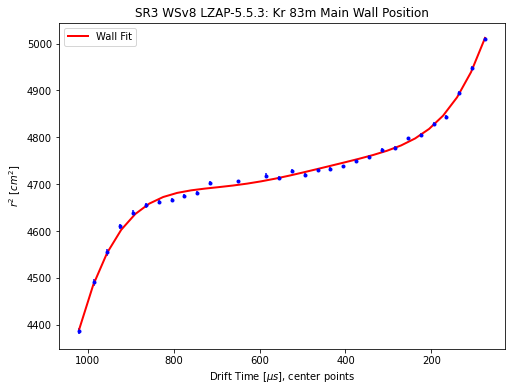

In [4]:
# plot drift time vs. r2

# Set up the figure and subplot
fig, ax = plt.subplots(1, figsize=(8, 6))

# Sample data points with errors in the x-axis
x_pts = dT_kr83m
y_pts = r2_kr83m
y_err = d_r2_kr83m

# plot points with error
plt.errorbar(x_pts, y_pts, yerr=y_err, fmt='b.')

def poly_func(x, *coeffs):
    y = np.polyval(coeffs, x)
    return y

# Perform polynomial fitting with curve_fit
deg = 6  
p0 = np.ones(deg)
popt_wall_fit, pcov_wall_fit = curve_fit(poly_func, x_pts, y_pts, p0=p0)#, sigma=y_err)

# Generate data for the wall polynomial curve
x_fit = np.linspace(min(x_pts), max(x_pts), num_slices)
y_fit = poly_func(x_fit, *popt_wall_fit)

# Define parameter names (e.g., a0, a1, a2, ...)
param_names = [f'a{i}' for i in range(deg)]

# Plot the wall polynomial fit
plt.plot(x_fit, y_fit, label='Wall Fit', lw=2, color='red')

# Setting labels and title
plt.xlabel('Drift Time [$\mu s$], center points')
plt.ylabel('$r^2$ [${cm}^2$]')
plt.title('SR3 WSv8 LZAP-5.5.3: Kr 83m Main Wall Position')
plt.legend()

# flip drift time axis
plt.gca().invert_xaxis()

# print fitting parameters
print(f"Wall Fit Coefficients, popt: {popt_wall_fit}")
print(f"Wall Fit Covariance Matrix, pcov: {pcov_wall_fit}")

# # Print fitting parameters with names
# for i, param_name in enumerate(param_names):
#     print(f"{param_name}: {popt_wall_fit[i]}")
    
# # Estimate the uncertainties of the fit parameters
# param_uncertainties = np.sqrt(np.abs(np.diag(pcov_wall_fit)))

# # Print the uncertainties of the fit parameters with names
# for i, (param_name, uncertainty) in enumerate(zip(param_names, param_uncertainties)):
#     print(f"{param_name}: {popt_wall_fit[i]} ± {uncertainty}")

In [6]:
print(num_slices)

30


In [5]:
# # save curve fit to a pickle file

# SR3v8_Kr83m_wall_fit = {
#     'wall_fit_coeffs_Kr83m': popt_wall_fit,
#     'wall_fit_cov_matrix_Kr83m': pcov_wall_fit,
#     'dT_us_fit_Kr83m': x_fit,
#     'r2_cm2_fit_Kr83m': y_fit, 
#     'dT_Kr83m_points': dT_kr83m,
#     'r2_Kr83m_points': r2_kr83m,
#     'd_r2_Kr83m_points': d_r2_kr83m,
#     'num_slices_Kr83m': num_slices
# }

# with open('SR3v8_Kr83m_wall_fit.pickle', 'wb') as file:
#     pickle.dump(SR3v8_Kr83m_wall_fit, file)